# Desafío Guiado - Gráficos y correlación
Simón Nanjarí - Desafío Latam.

1. **Importar librerías y .csv**

● Importe las librerías básicas para el análisis de datos

● Descargue e importe el archivo nations.csv.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [23]:
df = pd.read_csv('./nations.csv', encoding = 'ISO-8859-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [108]:
df.columns

Index(['country', 'region', 'gdp', 'school', 'adfert', 'chldmort', 'life',
       'pop', 'urban', 'femlab', 'literacy', 'co2', 'gini', 'binarize'],
      dtype='object')

2. **Refactorizar gráficos matplotlib a seaborn.**

A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn.
Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

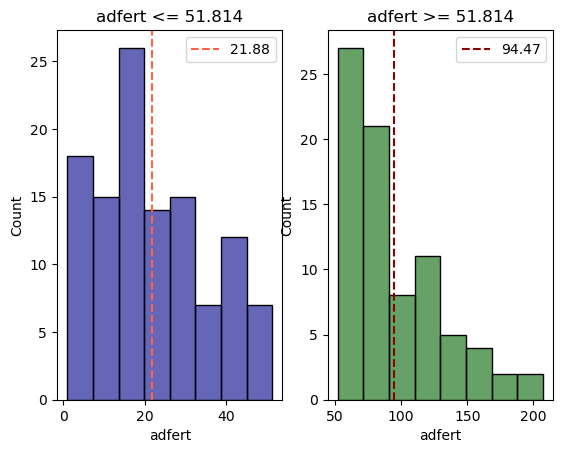

In [82]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    sns.histplot(hist_0, alpha=.6, color='darkblue')
    plt.axvline(np.mean(hist_0), color = 'tomato', linestyle = '--', label = round(np.mean(hist_0), 2))
    plt.title("{0} <= {1}".format(variable, round(tmp[variable].mean(), 3)))
    plt.legend()
    plt.subplot(1, 2, 2)
    sns.histplot(hist_1, alpha=.6, color='darkgreen')
    plt.axvline(np.mean(hist_1), color = 'darkred', linestyle = '--', label = round(np.mean(hist_1), 2))
    plt.title("{0} >= {1}".format(variable, round(tmp[variable].mean(), 3)))
    plt.legend()
binarize_histogram(df, 'adfert')

In [83]:
#Seaborn
def binarize_histogram_seaborn(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    sns.distplot(hist_1, palette = 'pastel1')

<AxesSubplot:xlabel='adfert', ylabel='Count'>

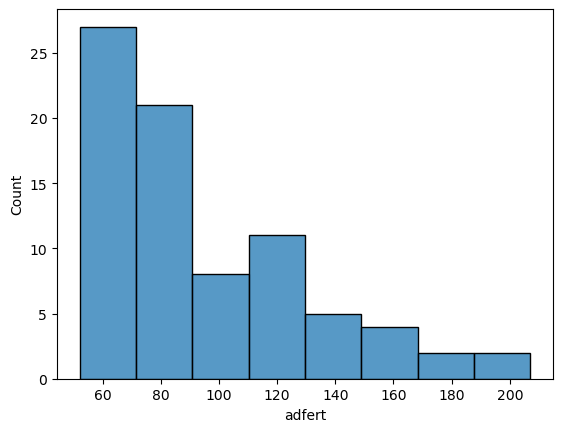

In [88]:
variable = 'adfert'
df['binarize'] = np.where(df[variable] > np.mean(df[variable]), 1,
    0)
hist_1 = df[df['binarize'] == 1][variable].dropna()
hist_0 = df[df['binarize'] == 0][variable].dropna()
sns.histplot(hist_1)

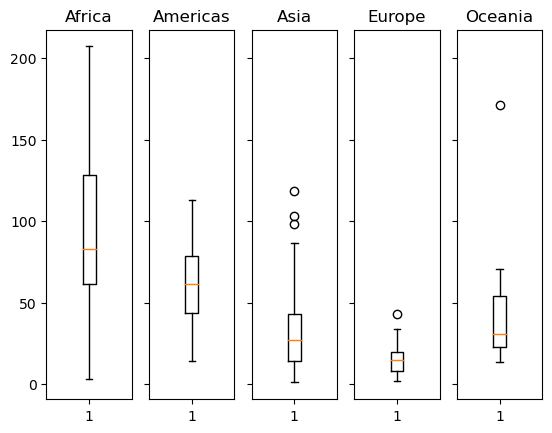

In [89]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')

<AxesSubplot:xlabel='adfert', ylabel='region'>

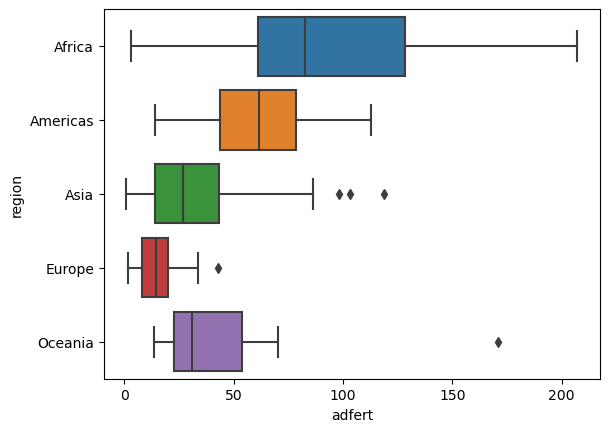

In [90]:
sns.boxplot(data = df, x='adfert', y='region')

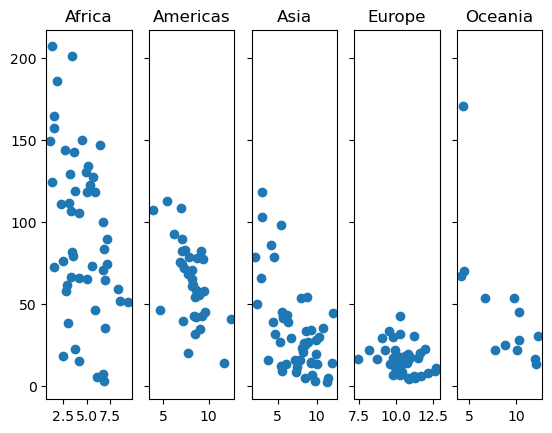

In [93]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

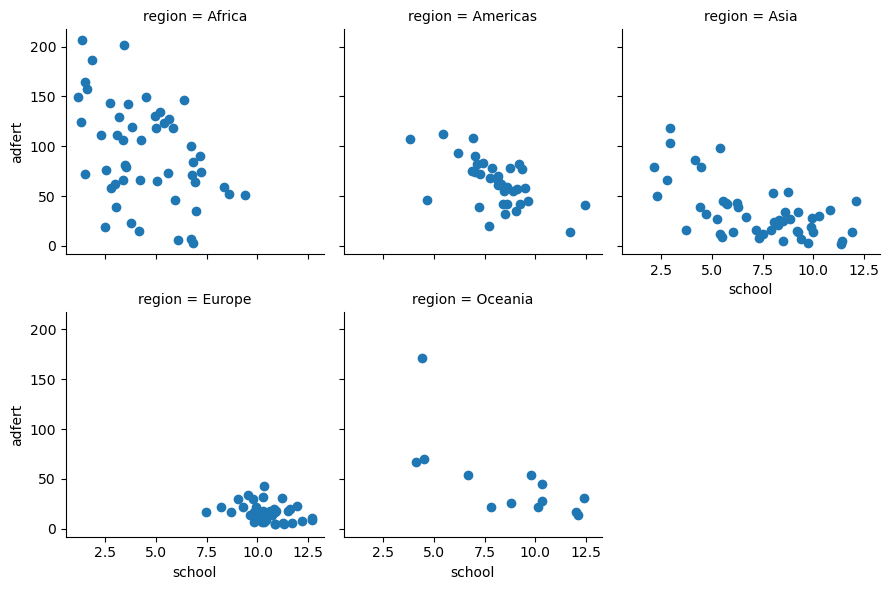

In [99]:
grid = sns.FacetGrid(df, col = 'region', col_wrap = 3)
grid.map(plt.scatter, 'school', 'adfert')

**Comente los principales resultados de los gráficos.**

Se hace una clara separación de las medias dentro de los gráficos (hist_0 y hist_1), donde se logra ver que la variable de Fertilidad Adolescente ('adfert') demuestra, que existe un aumento considerable en las regiones de Burkina Faso y Benin respecto a los embarazos de mujeres recidentes de estas regiones.

3. **Generar un heatmap entre todas las variables**

Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6


<AxesSubplot:>

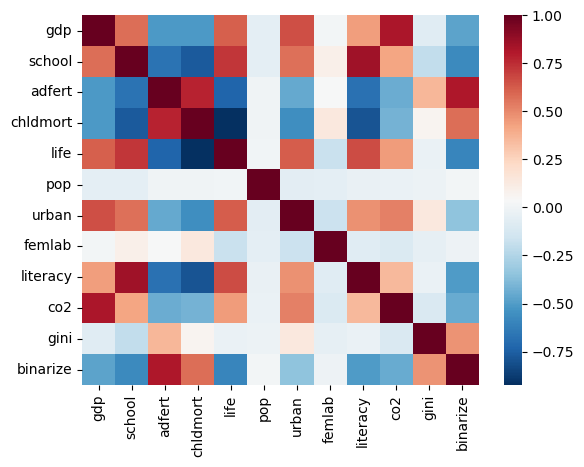

In [114]:
corr = df.corr()
sns.heatmap(corr, annot =False, cmap = 'RdBu_r')

Comentarios;

A partir del gráfico generado, se puede considerar que las variables con color más rojizo son aquellas que tienen una alta correlación entre sí, es decir, por ejemplo; a mayor Producto Interno Bruto per cápita ('gdp'), mayor es la variable de Promedio años de escolaridad ('school'), como a su vez, mayores son las emiciones de Toneladas de Co2 mitidas per cápita ('co2'). En cambio, si revisamos la variable Probabilidad de muerte antes de los 5 años por cada 1000('chldmort'), menor es la Esperanza de vida al nacer ('life').


4. **A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones**

Comente brevemente las principales correlaciones a través de las regiones.

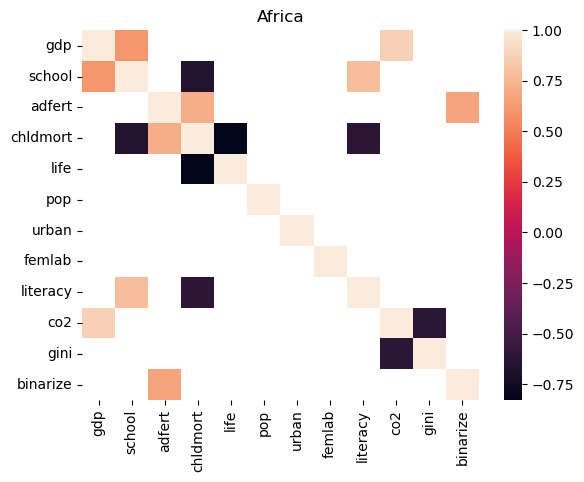

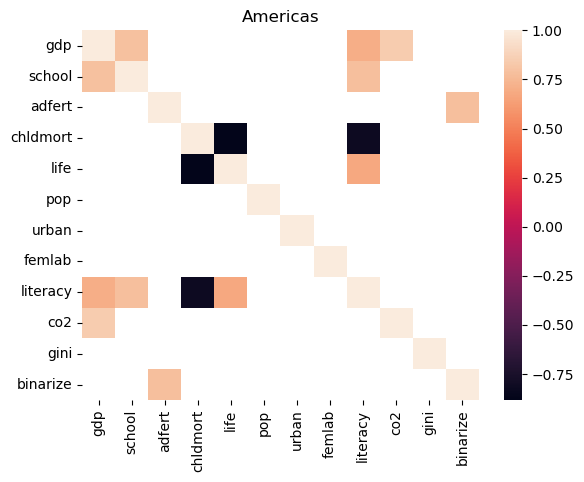

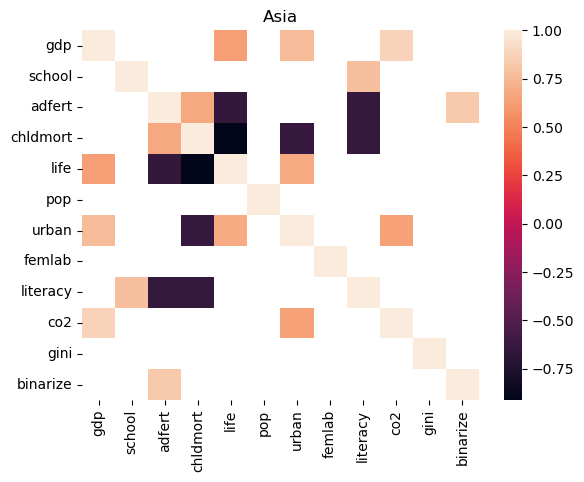

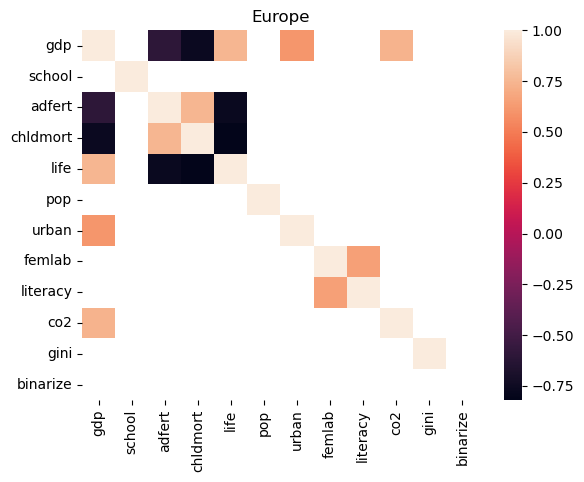

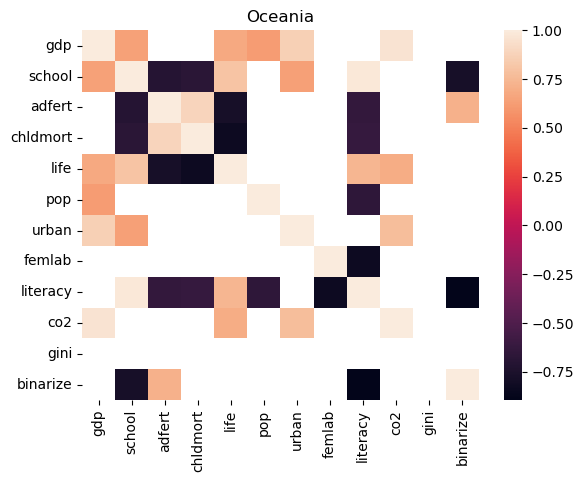

In [125]:
regiones = df['region'].unique()
for region in regiones:
    matriz_corr = df[df['region']==region].corr()
    plt.figure()
    sns.heatmap(matriz_corr[(matriz_corr> 0.6)| (matriz_corr < -0.6)])
    plt.title(region)

Respecto a la variable Producto Interno Bruto per cápita ('gdp') y su relación con la variable de Promedio años de escolaridad ('school'), Asía es la única regíon que no lo considera y no se encuentran relacionadas.

Además, En la región de America, la Probabilidad de muerte antes de los 5 años por cada 1000('chldmort'), es inversamente proporcional a la variable de Tasa de alfabetismo ('literacy'), es decir, a menor Probabilidad de muerte antes de los 5 años por cada 1000, mayor es la Tasa de Alafebetismo. 



